<a href="https://colab.research.google.com/github/ksungkeun84/TAMIDS/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO: 
1. testing for accuracy rate, make graph 
2. currently testing with depart. atm, need to deal with affiliation and funder in same way
3. text preprocessing need improvement
4. experiment with different classifier and how to fine tune these (add argument/parameter)
5. there's this pipeline thingy from one of the link that can make code cleaner
6. four word cloud generation and research other visualization tool/technique


In [ ]:
# Always need to be run first to upload the data stored in public repository
!pip install scikit-multilearn
import nltk
nltk.download('stopwords')
import zipfile
!wget https://github.com/kp53456/temp/raw/main/data_input.zip
zip_ref = zipfile.ZipFile("/content/data_input.zip", "r")
zip_ref.extractall()
zip_ref.close()

     |████████████████████████████████| 89 kB 3.2 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
--2022-04-05 16:10:03--  https://github.com/kp53456/temp/raw/main/data_input.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kp53456/temp/main/data_input.zip [following]
--2022-04-05 16:10:03--  https://raw.githubusercontent.com/kp53456/temp/main/data_input.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12196980 (12M) [application/zip]
Saving to: ‘data_input.zip’

data_input.zip      100%[===================>]  11.63M 

Experiment #1 : testing with a few classifier using tfidvectorizer

In [ ]:
import pandas
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pandas.read_csv("/content/data_input.csv", encoding = "ISO-8859-1")
exp = df.iloc[:1000, :4] # only testing with partial data
#print(exp)

word_dic = {}
header = ['Title', 'Departments', 'Affiliations (GRID)', 'Funder']
# dictionary
# topic : {Department : set(), Affiliations : set(), Funder : set()}

# experiment with departmet first
# topic : list of department
test_dic = {}
for n in range(exp.shape[0]):
  title = df.loc[n, header[0]]
  dep = df.loc[n, header[1]]
  dep_list = []
  if (isinstance(dep, str)):
    dep_list = [x.strip() for x in dep.split('; ')]
    if "Texas A&M" in dep_list:
      dep_list.remove("Texas A&M")

  if (isinstance(title, str)):
    test_dic[title.lower()] = dep_list
    # tokenized = nltk.word_tokenize(title.lower())
    # nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if(pos[:2] == 'NN')]
    # revised_title = ' '.join(nouns)
    # test_dic[revised_title] = dep_list

new_df = pandas.DataFrame(test_dic.items(), columns=['title', 'tags'])
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(new_df['tags'])
tfidf = TfidfVectorizer(analyzer='word', max_features=500, ngram_range=(1,3), stop_words='english')
X = tfidf.fit_transform(new_df['title'])
#print(multilabel.inverse_transform(classifier.predict(x_test)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
classifier = {"BinaryRelevance" : BinaryRelevance(GaussianNB()), "ClassifierChain" : ClassifierChain(GaussianNB()), 
              "LabelPowerSet" : LabelPowerset(GaussianNB()), "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=3),
              "DecisionTreeClassifier" : DecisionTreeClassifier(), "RandomForestClassifier" : RandomForestClassifier()}
for clf in classifier:
  classifier[clf].fit(x_train, y_train)
  prediction = classifier[clf].predict(x_test)
  print(clf + " - accuracy score: " + str(accuracy_score(prediction,y_test)) +
   ", hamming loss: " + str(hamming_loss(y_test, prediction)))
  print()


BinaryRelevance - accuracy score: 0.18090452261306533, hamming loss: 0.08384990646663977

ClassifierChain - accuracy score: 0.18592964824120603, hamming loss: 0.02512562814070352

LabelPowerSet - accuracy score: 0.2663316582914573, hamming loss: 0.026372739610461063

KNeighborsClassifier - accuracy score: 0.17587939698492464, hamming loss: 0.01819315555881598

DecisionTreeClassifier - accuracy score: 0.22613065326633167, hamming loss: 0.024465392656714227

RandomForestClassifier - accuracy score: 0.20100502512562815, hamming loss: 0.01723948208194256



Experiment #2 : text cleaning, test using countvectorizer, and word cloud 

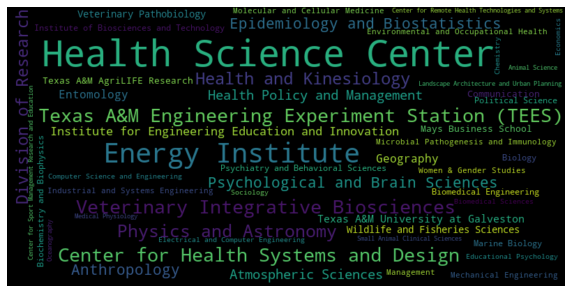


BinaryRelevance - accuracy score: 0.21608040201005024, hamming loss: 0.03297509445035396

ClassifierChain - accuracy score: 0.22613065326633167, hamming loss: 0.01797307706415288

LabelPowerSet - accuracy score: 0.3417085427135678, hamming loss: 0.021604372226093974

KNeighborsClassifier - accuracy score: 0.12562814070351758, hamming loss: 0.018303194806147526

DecisionTreeClassifier - accuracy score: 0.25125628140703515, hamming loss: 0.021090855738546747

RandomForestClassifier - accuracy score: 0.15577889447236182, hamming loss: 0.01716612258372153



In [ ]:
import pandas
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pandas.read_csv("/content/data_input.csv", encoding = "ISO-8859-1")
exp = df.iloc[:1000, :4] # only testing with partial data

def text_cleaning(a):
  cleaning = [char for char in a if char not in string.punctuation]
  cleaning=''.join(cleaning)
  return [word for word in cleaning.split() if word.lower() not in stopwords.words('english')]

header = ['Title', 'Departments', 'Affiliations (GRID)', 'Funder']
test_dic = {}
test_cloud = {}
for n in range(exp.shape[0]):
  title = df.loc[n, header[0]]
  dep = df.loc[n, header[1]]
  dep_list = []
  if (isinstance(dep, str)):
    dep_list = [x.strip() for x in dep.split('; ')]
    if "Texas A&M" in dep_list:
      dep_list.remove("Texas A&M")
    for k in dep_list:
      if not (("College of" in k) or ("School of" in k)):
        if k in test_cloud:
          test_cloud[k] = test_cloud[k] + 1
        else:
          test_cloud[k] = 1

  if (isinstance(title, str)):
    test_dic[title.lower()] = dep_list

wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(test_cloud)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
print()
# Hamming loss is the fraction of labels that are incorrectly predicted
new_df = pandas.DataFrame(test_dic.items(), columns=['title', 'tags'])
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(new_df['title']) 
title_bow = bow_transformer.transform(new_df['title'])
X = title_bow.toarray()
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(new_df['tags'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
classifier = {"BinaryRelevance" : BinaryRelevance(GaussianNB()), "ClassifierChain" : ClassifierChain(GaussianNB()), 
              "LabelPowerSet" : LabelPowerset(GaussianNB()), "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=3),
              "DecisionTreeClassifier" : DecisionTreeClassifier(), "RandomForestClassifier" : RandomForestClassifier()}
for clf in classifier:
  classifier[clf].fit(x_train, y_train)
  prediction = classifier[clf].predict(x_test)
  print(clf + " - accuracy score: " + str(accuracy_score(prediction,y_test)) +
   ", hamming loss: " + str(hamming_loss(y_test, prediction)))
  print()